In [374]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro,Boltzmann

In [375]:
#intializing params
pos = np.array([[1,1],[5,2],[10,6]])

dt = 0.001
n = 10000
T =273
mass = (39.59/Avogadro)*1e-3
epsilon = 0.0104#eV
sigma = 3.40 #Å
print(pos)
t = np.arange(0,n*dt,dt)

[[ 1  1]
 [ 5  2]
 [10  6]]


In [376]:
r = np.zeros(shape=(pos.shape[0],pos.shape[0],2))
r

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [377]:

for i in range(pos.shape[0] - 1):
    for j in range(i+1,pos.shape[0]):
        for k in range(0,2):
            r[i,j,k] = pos[j,k] - pos[i,k]
            r[j,i,k] = - r[i,j,k]
print(r[1,0])

[-4. -1.]


In [378]:
pos[1]

array([5, 2])

In [379]:
def LJ_Force(x,sigma = sigma , epsilon = epsilon): 
    return 4*epsilon*((((12*np.power(sigma,12))/np.power(x,13)))-(((6*np.power(sigma,6))/np.power(x,7))))


In [380]:

def getAcceleration(pos):
    acc = np.zeros(shape=(pos.shape[0],pos.shape[0],pos.shape[1]))
    for i in range(pos.shape[0] - 1):
        for j in range(i+1,pos.shape[0]):
            r_vec = pos[j] - pos[i]
            r_mag = np.linalg.norm(r_vec)
            F_mag = LJ_Force(r_mag)
            for k in range(0,2):
                F_vec = F_mag*r_vec[k]/r_mag
                acc[i,j,k] = F_vec*1.602e-23/mass
                acc[j,i,k] = -(F_vec/mass)* 1.602e-23
    acc = np.sum(acc,axis=0)
    return acc

getAcceleration(pos)

array([[ 1.67678442,  0.4212375 ],
       [-1.51129927, -0.2904825 ],
       [-0.16548515, -0.130755  ]])

In [381]:
N = pos.shape[0]
acc = np.zeros((N, 2))  # acceleration per particle (x,y)

for i in range(N - 1):
    for j in range(i + 1, N):
        r_vec = pos[j] - pos[i]         # vector from j→i
        print(r_vec)    
        r_mag = np.linalg.norm(r_vec)    # scalar distance
        F_mag = LJ_Force(r_mag)          # scalar magnitude
        
        # Force vector (on i due to j)
        F_vec = F_mag * (r_vec / r_mag)  # (x,y)
        
        # Accumulate acceleration (convert eV/Å → kg·Å/ps²)
        acc[i] += (F_vec * 1.602e-23) / mass
        acc[j] -= (F_vec * 1.602e-23) / mass  # Newton’s 3rd law
acc

[4 1]
[9 5]
[5 4]


array([[-1.67678442, -0.4212375 ],
       [ 1.51129927,  0.2904825 ],
       [ 0.16548515,  0.130755  ]])

In [382]:
np.random.Generator.standard_normal?

Signature:     
np.random.Generator.standard_normal(
    self,
    size=None,
    dtype=<class 'numpy.float64'>,
    out=None,
)
Call signature: np.random.Generator.standard_normal(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction Generator.standard_normal at 0x00000250A74419C0>
Docstring:     
standard_normal(size=None, dtype=np.float64, out=None)

Draw samples from a standard Normal distribution (mean=0, stdev=1).

Parameters
----------
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result, only `float64` and `float32` are supported.
    Byteorder must be native. The default value is np.float64.
out : ndarray, optional
    Alternative output array in which to place the result. If size is not None,
    it must have the same shape as the provid

In [383]:
#velocity
rng = np.random.default_rng()
sigma_v = np.sqrt(Boltzmann * T / mass)
velocities_mps = np.random.uniform(0.0, sigma_v, size=(N,2))
# velocities_mps = rng.standard_normal(size=(N,2))
for i in range(N):
    velocities_mps[i] = np.sqrt(2*Boltzmann * T / mass)*(velocities_mps[i]/np.linalg.norm(velocities_mps[i]))
# print(velocities_mps)
velocities_ang_ps = velocities_mps * 1e-2
np.linalg.norm(velocities_mps[0])
# velocities_mps
# np.sqrt(2*Boltzmann * T / mass)

np.float64(338.62628260416)

In [384]:
# Verlet algo

pos_steps = np.zeros(shape=(n,N,2))
vel_steps = np.zeros(shape =(n,N,2))
vel =velocities_ang_ps
pos2 = pos
acc
for i in range(n):
    vel_half = vel + 0.5*acc*dt
    newpos = pos2 + vel_half*dt
    newacc = getAcceleration(newpos)
    newvel = vel_half + 0.5*newacc*dt
    pos_steps[i,:] = newpos
    vel_steps[i,:] = newvel
    vel = newvel
    pos2 = newpos
    acc = newacc
    
pos_steps
vel_steps

array([[[2.02480588, 2.71421033],
        [3.30082455, 0.75586358],
        [3.29063117, 0.79907598]],

       [[2.02648446, 2.71463059],
        [3.29931145, 0.75557408],
        [3.29046569, 0.79894523]],

       [[2.02816422, 2.71505019],
        [3.29779716, 0.75528522],
        [3.29030022, 0.79881448]],

       ...,

       [[2.07726685, 1.84932157],
        [4.26013224, 1.5134807 ],
        [2.2788625 , 0.90634763]],

       [[2.07814478, 1.8507544 ],
        [4.25929901, 1.51201049],
        [2.27881781, 0.90638501]],

       [[2.07902412, 1.85218803],
        [4.25846435, 1.51053947],
        [2.27877313, 0.90642239]]], shape=(10000, 3, 2))

In [385]:
pos_steps[:,0,:]

array([[ 1.00202397,  1.002714  ],
       [ 1.00404961,  1.00542842],
       [ 1.00607694,  1.00814326],
       ...,
       [31.10097585, 17.48326451],
       [31.10305355, 17.48511455],
       [31.10513214, 17.48696602]], shape=(10000, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

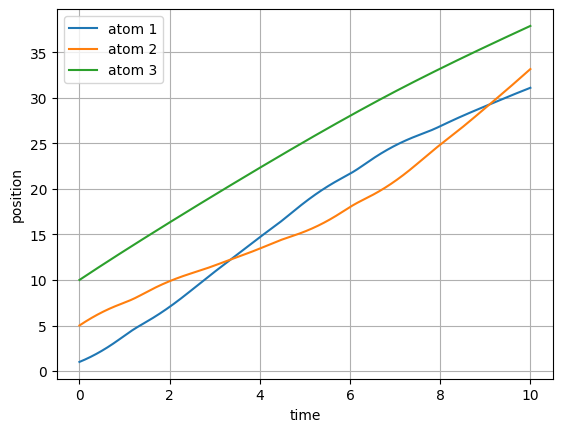

In [386]:
for i in range (pos.shape[0]):
    plt.plot(t,pos_steps[:,i,0],label = 'atom {}'.format(i+1))
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
# plt.ylim(0,25)
plt.grid()
plt.show

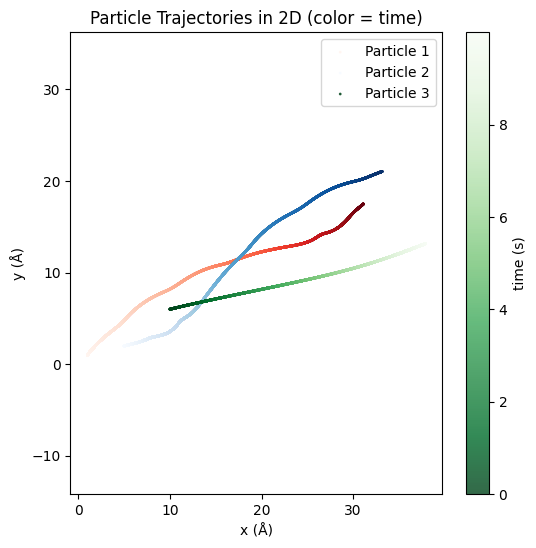

In [387]:
x = pos_steps[:, :, 0]   # shape (10000, 3)
y = pos_steps[:, :, 1]   # shape (10000, 3)

plt.figure(figsize=(6,6))
cmap = [plt.cm.Reds,plt.cm.Blues,plt.cm.Greens_r]
for i in range(x.shape[1]):
    sc = plt.scatter(x[:, i], y[:, i], c=t, cmap=cmap[i], s=1, label=f'Particle {i+1}', alpha=0.8)

plt.xlabel('x (Å)')
plt.ylabel('y (Å)')
plt.title('Particle Trajectories in 2D (color = time)')
plt.legend()
plt.axis('equal')
plt.colorbar(sc, label='time (s)')
plt.show()


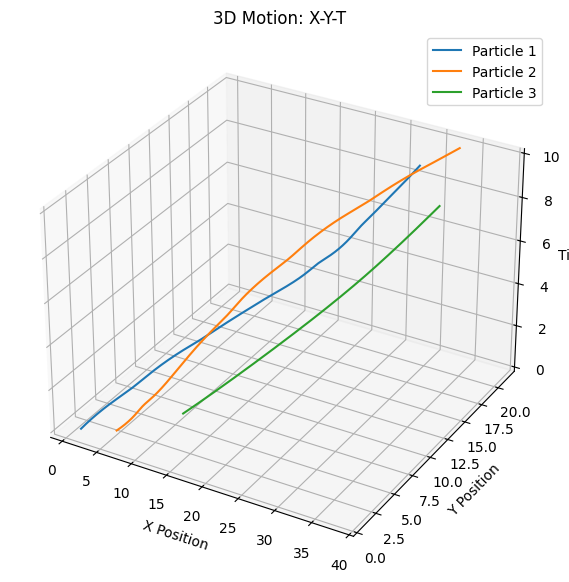

In [388]:
# from matplotlib.animation import FuncAnimation

# fig, ax = plt.subplots(figsize=(8, 8))
# scat = ax.scatter(x[0], y[0], s=100)  # increased marker size for better visibility
# ax.set_xlim(np.min(x)-1, np.max(x)+1)  # add some padding to the limits
# ax.set_ylim(np.min(y)-1, np.max(y)+1)
# ax.set_xlabel('x (Å)')
# ax.set_ylabel('y (Å)')
# ax.set_title('Particle Motion')
# ax.grid(True)

# def update(frame):
#     scat.set_offsets(np.c_[x[frame], y[frame]])
#     return scat,

# # Reduced number of frames and increased interval for smoother animation
# ani = FuncAnimation(fig, update, frames=len(t)//10, interval=50, blit=True)
# from IPython.display import HTML
# HTML(ani.to_jshtml())
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example parameters
dt = 0.001
time = np.arange(pos_steps.shape[0]) * dt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each particle's motion
for i in range(pos_steps.shape[1]):
    x = pos_steps[:, i, 0]
    y = pos_steps[:, i, 1]
    t = time
    ax.plot(x, y, t, label=f'Particle {i+1}')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Time')
ax.set_title('3D Motion: X-Y-T')
ax.legend()
plt.show()



In [389]:
A = np.array([[1,2,3],[1,3,2]])
A.shape

(2, 3)